# Import libraries

In [1]:
from GANs import AdversarialNetwork
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Import dataset

# MNIST GANs training pipeline

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize to [-1, 1]
])

# Download and load the training dataset
mnist = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
dataloader = torch.utils.data.DataLoader(mnist, batch_size=64, shuffle=True)
for real_images, _ in dataloader:
    print("real_images shape:", real_images.shape)  # Expect [64, 1, 28, 28]
    break

real_images shape: torch.Size([64, 1, 28, 28])


In [3]:
adversarial_net = AdversarialNetwork(input_height=28, input_width=28, input_channels=1, kernel_size=4)

latent_dim = 100  # Size of the random noise vector
epochs = 200
hidden = 64

# Create generator and discriminator
generator = adversarial_net.create_generator(latent_dim=latent_dim, hidden = hidden)
discriminator = adversarial_net.create_discriminator(hidden = hidden)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
generator = generator.to(device)
discriminator = discriminator.to(device)

real_images, _ = next(iter(dataloader))  # get one batch
real_images = real_images.to(device)
adversarial_net.debug_discriminator_output(discriminator, real_images)

cuda
After layer 0 (Conv2d(1, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))): torch.Size([64, 64, 14, 14])
After layer 1 (LeakyReLU(negative_slope=0.2, inplace=True)): torch.Size([64, 64, 14, 14])
After layer 2 (Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))): torch.Size([64, 128, 7, 7])
After layer 3 (BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)): torch.Size([64, 128, 7, 7])
After layer 4 (LeakyReLU(negative_slope=0.2, inplace=True)): torch.Size([64, 128, 7, 7])
After layer 5 (Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))): torch.Size([64, 256, 4, 4])
After layer 6 (BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)): torch.Size([64, 256, 4, 4])
After layer 7 (LeakyReLU(negative_slope=0.2, inplace=True)): torch.Size([64, 256, 4, 4])
After layer 8 (Conv2d(256, 1, kernel_size=(4, 4), stride=(1, 1))): torch.Size([64, 1, 1, 1])
After layer 9 (Flatten(start_dim=1, end_dim=-1

Epoch [1/200], D Loss: 0.9964, G Loss: 0.5613
Epoch [2/200], D Loss: 0.6751, G Loss: 1.7501
Epoch [3/200], D Loss: 1.2716, G Loss: 0.4575
Epoch [4/200], D Loss: 0.9682, G Loss: 0.6357
Epoch [5/200], D Loss: 0.7983, G Loss: 0.8527
Epoch [6/200], D Loss: 1.4581, G Loss: 0.3931
Epoch [7/200], D Loss: 2.3611, G Loss: 0.2209
Epoch [8/200], D Loss: 0.5320, G Loss: 2.6500
Epoch [9/200], D Loss: 1.1765, G Loss: 0.5127
Epoch [10/200], D Loss: 0.5017, G Loss: 1.7512


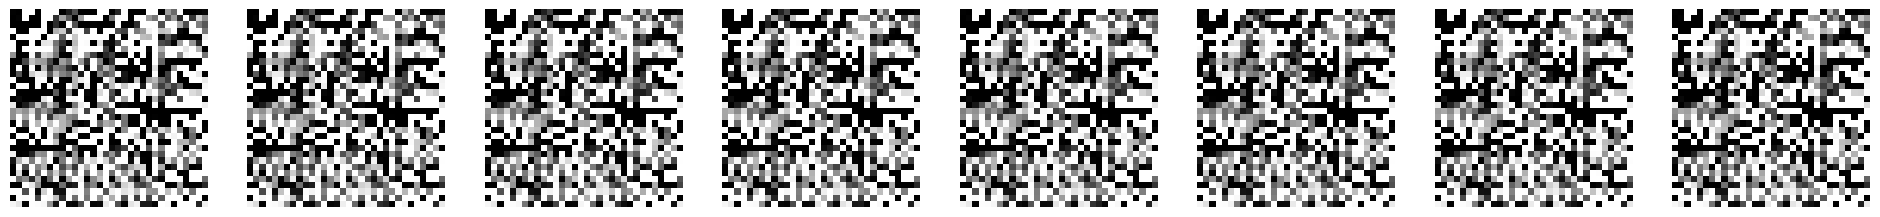

Epoch [11/200], D Loss: 0.5664, G Loss: 1.3053
Epoch [12/200], D Loss: 1.3724, G Loss: 0.3935
Epoch [13/200], D Loss: 1.3282, G Loss: 0.4025
Epoch [14/200], D Loss: 0.4834, G Loss: 2.2009
Epoch [15/200], D Loss: 0.8535, G Loss: 1.6739
Epoch [16/200], D Loss: 1.3935, G Loss: 0.3999
Epoch [17/200], D Loss: 0.8240, G Loss: 1.1715
Epoch [18/200], D Loss: 1.7901, G Loss: 0.3240
Epoch [19/200], D Loss: 0.5827, G Loss: 1.6154
Epoch [20/200], D Loss: 1.4945, G Loss: 0.3396


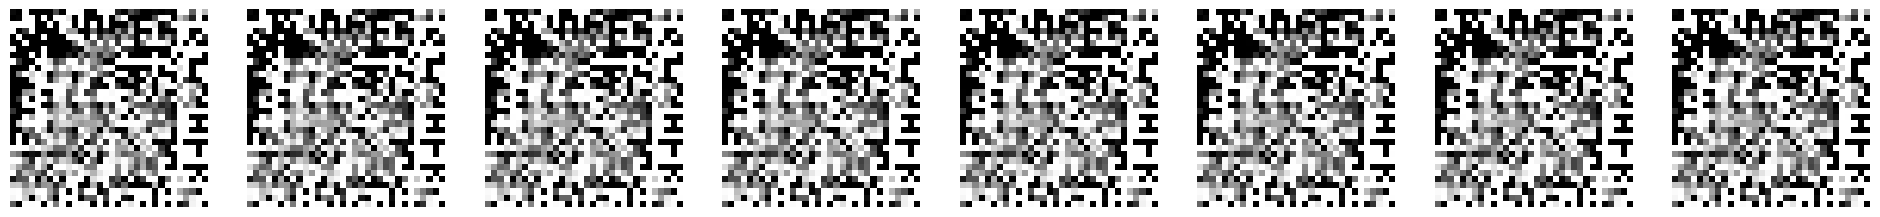

Epoch [21/200], D Loss: 0.4273, G Loss: 2.5445
Epoch [22/200], D Loss: 2.3117, G Loss: 0.2225
Epoch [23/200], D Loss: 0.4467, G Loss: 1.9447
Epoch [24/200], D Loss: 0.4700, G Loss: 2.3357
Epoch [25/200], D Loss: 0.4246, G Loss: 2.2846
Epoch [26/200], D Loss: 2.4826, G Loss: 0.2214
Epoch [27/200], D Loss: 1.7592, G Loss: 0.2820
Epoch [28/200], D Loss: 3.7622, G Loss: 0.2043
Epoch [29/200], D Loss: 0.6095, G Loss: 1.4248
Epoch [30/200], D Loss: 0.4589, G Loss: 2.0919


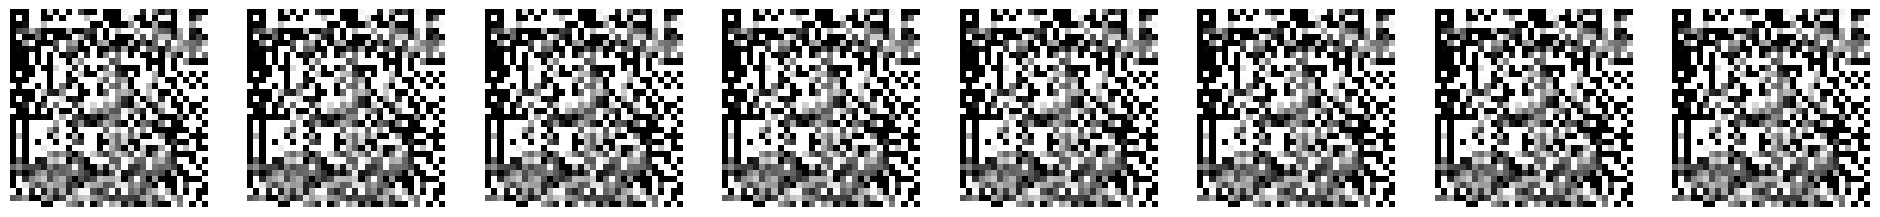

Epoch [31/200], D Loss: 3.1405, G Loss: 0.2013
Epoch [32/200], D Loss: 0.6263, G Loss: 1.7171
Epoch [33/200], D Loss: 0.7690, G Loss: 3.2781
Epoch [34/200], D Loss: 2.4643, G Loss: 0.2382
Epoch [35/200], D Loss: 1.4825, G Loss: 0.5769
Epoch [36/200], D Loss: 3.6998, G Loss: 0.1991
Epoch [37/200], D Loss: 1.6163, G Loss: 0.3743
Epoch [38/200], D Loss: 1.5182, G Loss: 0.3402
Epoch [39/200], D Loss: 0.4717, G Loss: 2.1760
Epoch [40/200], D Loss: 3.1158, G Loss: 0.1991


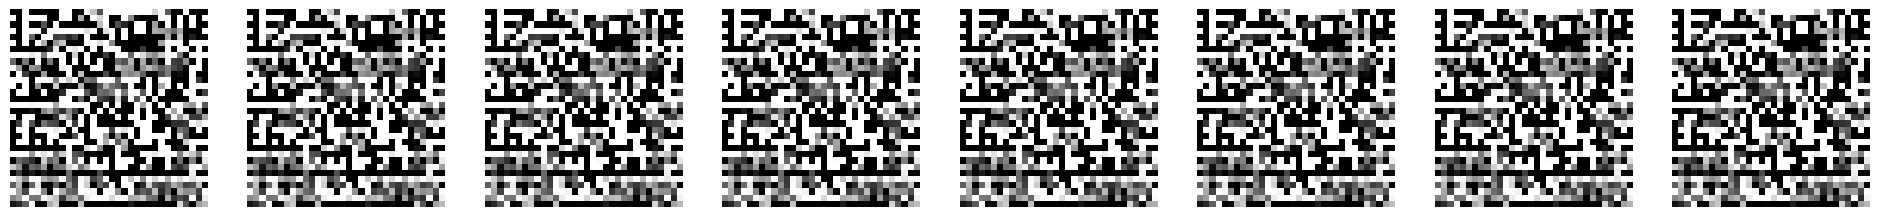

Epoch [41/200], D Loss: 0.4514, G Loss: 2.3083
Epoch [42/200], D Loss: 0.7616, G Loss: 4.0696
Epoch [43/200], D Loss: 2.8630, G Loss: 0.2122
Epoch [44/200], D Loss: 5.0506, G Loss: 0.2484
Epoch [45/200], D Loss: 0.6125, G Loss: 3.9725
Epoch [46/200], D Loss: 4.8555, G Loss: 0.2113
Epoch [47/200], D Loss: 1.7069, G Loss: 1.3708
Epoch [48/200], D Loss: 1.3726, G Loss: 0.4506
Epoch [49/200], D Loss: 1.4955, G Loss: 5.1139
Epoch [50/200], D Loss: 3.9103, G Loss: 0.2086


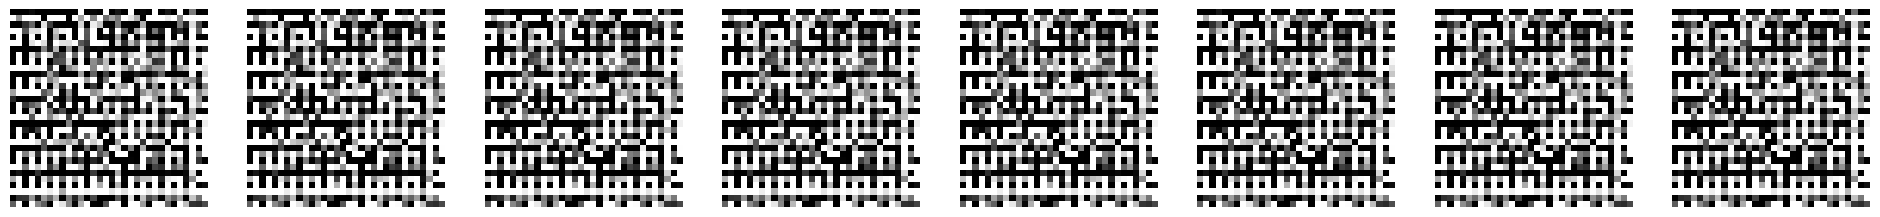

Epoch [51/200], D Loss: 0.8758, G Loss: 5.2959
Epoch [52/200], D Loss: 1.3174, G Loss: 0.9178
Epoch [53/200], D Loss: 5.7848, G Loss: 0.2069
Epoch [54/200], D Loss: 1.1860, G Loss: 3.0730
Epoch [55/200], D Loss: 4.1773, G Loss: 0.2072
Epoch [56/200], D Loss: 5.3155, G Loss: 0.2326
Epoch [57/200], D Loss: 4.9487, G Loss: 0.2238
Epoch [58/200], D Loss: 1.7907, G Loss: 12.5792
Epoch [59/200], D Loss: 2.7701, G Loss: 8.4998
Epoch [60/200], D Loss: 5.1237, G Loss: 0.7381


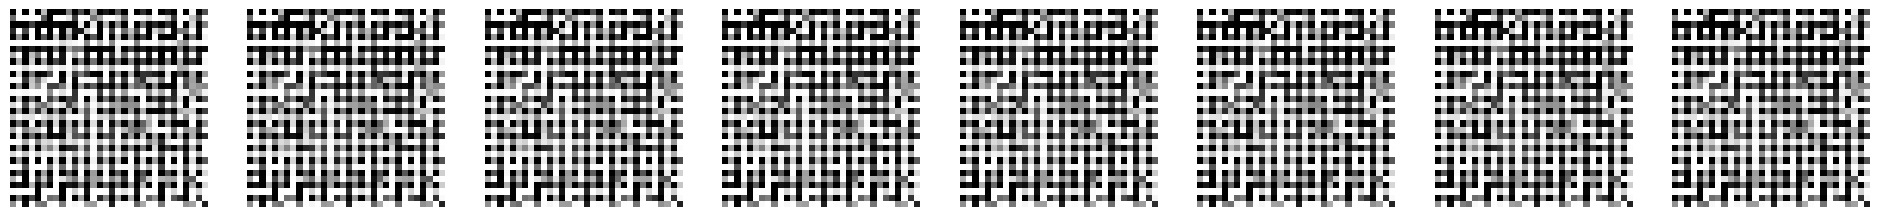

Epoch [61/200], D Loss: 5.2467, G Loss: 0.2843
Epoch [62/200], D Loss: 5.0128, G Loss: 0.2603
Epoch [63/200], D Loss: 5.3995, G Loss: 0.2331
Epoch [64/200], D Loss: 5.2158, G Loss: 2.9615
Epoch [65/200], D Loss: 5.3660, G Loss: 6.8712
Epoch [66/200], D Loss: 5.2815, G Loss: 3.0798
Epoch [67/200], D Loss: 5.4489, G Loss: 8.5774
Epoch [68/200], D Loss: 5.3954, G Loss: 7.4741
Epoch [69/200], D Loss: 8.0837, G Loss: 0.2054
Epoch [70/200], D Loss: 8.0217, G Loss: 0.2043


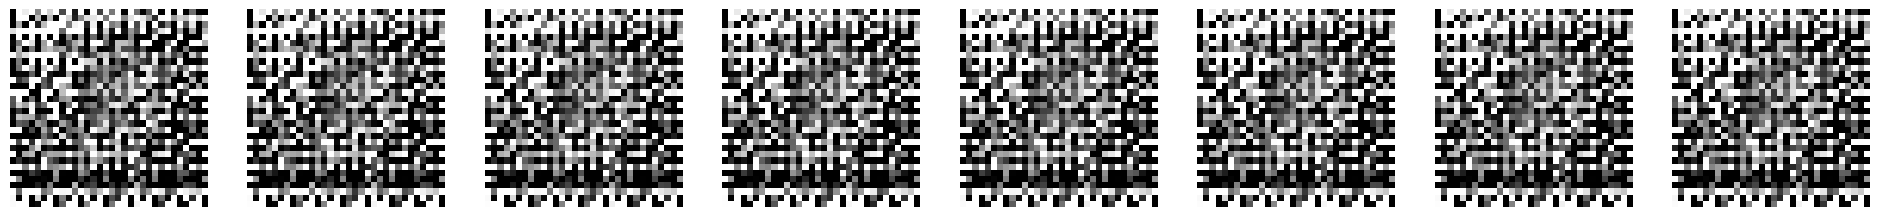

Epoch [71/200], D Loss: 5.3432, G Loss: 6.1014
Epoch [72/200], D Loss: 5.3086, G Loss: 6.3057
Epoch [73/200], D Loss: 8.0400, G Loss: 0.2041
Epoch [74/200], D Loss: 7.8830, G Loss: 0.2030
Epoch [75/200], D Loss: 10.2954, G Loss: 0.3023
Epoch [76/200], D Loss: 4.6676, G Loss: 2.6599
Epoch [77/200], D Loss: 4.5302, G Loss: 4.1799
Epoch [78/200], D Loss: 5.2364, G Loss: 6.9651
Epoch [79/200], D Loss: 5.3604, G Loss: 9.9659
Epoch [80/200], D Loss: 5.9248, G Loss: 1.2865


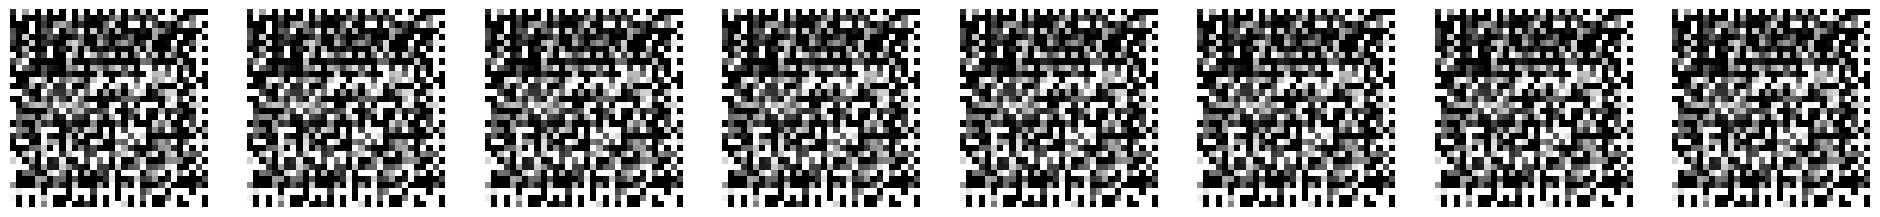

Epoch [81/200], D Loss: 49.9757, G Loss: 35.1715
Epoch [82/200], D Loss: 34.9911, G Loss: 63.3777
Epoch [83/200], D Loss: 26.7313, G Loss: 75.4024
Epoch [84/200], D Loss: 26.8750, G Loss: 78.1250
Epoch [85/200], D Loss: 26.8750, G Loss: 78.1250
Epoch [86/200], D Loss: 32.4662, G Loss: 71.8526
Epoch [87/200], D Loss: 43.5403, G Loss: 57.2670
Epoch [88/200], D Loss: 32.6210, G Loss: 65.7173
Epoch [89/200], D Loss: 38.1250, G Loss: 66.8750
Epoch [90/200], D Loss: 10.0000, G Loss: 95.0000


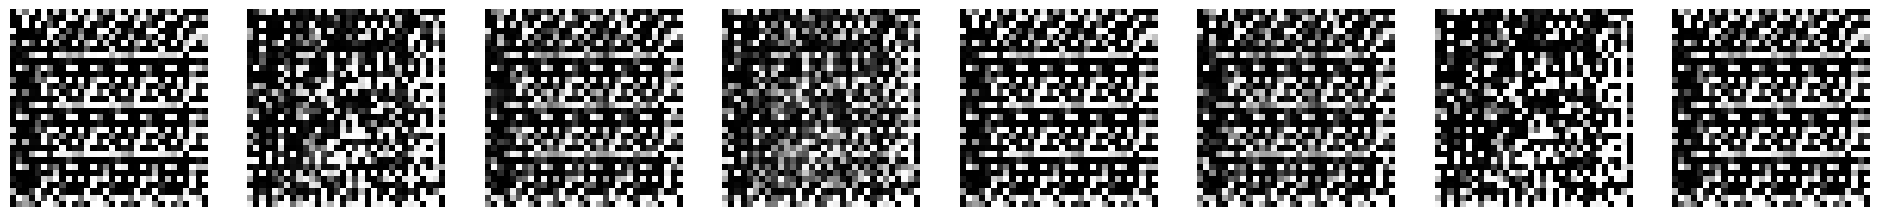

Epoch [91/200], D Loss: 10.0000, G Loss: 95.0000
Epoch [92/200], D Loss: 10.0000, G Loss: 95.0000
Epoch [93/200], D Loss: 10.0000, G Loss: 95.0000
Epoch [94/200], D Loss: 10.0000, G Loss: 95.0000
Epoch [95/200], D Loss: 10.0000, G Loss: 95.0000
Epoch [96/200], D Loss: 10.0000, G Loss: 95.0000
Epoch [97/200], D Loss: 10.0000, G Loss: 95.0000
Epoch [98/200], D Loss: 10.0000, G Loss: 95.0000
Epoch [99/200], D Loss: 10.0000, G Loss: 95.0000
Epoch [100/200], D Loss: 10.0000, G Loss: 95.0000


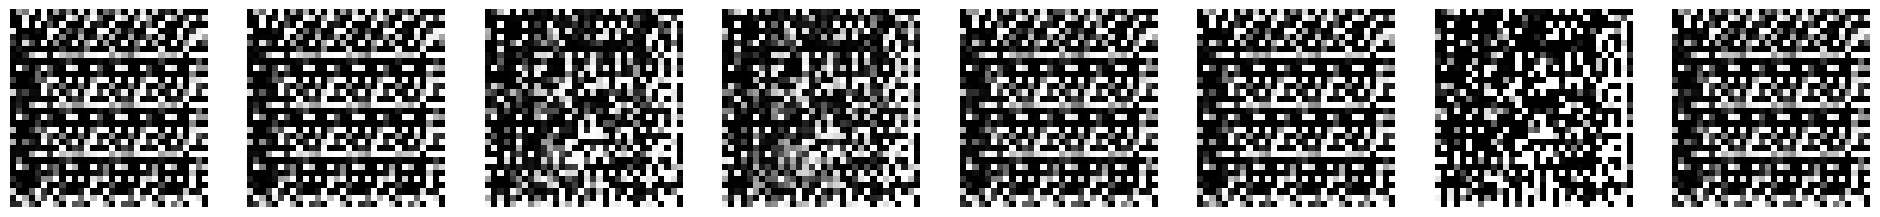

Epoch [101/200], D Loss: 10.0000, G Loss: 95.0000
Epoch [102/200], D Loss: 10.0000, G Loss: 95.0000
Epoch [103/200], D Loss: 10.0000, G Loss: 95.0000
Epoch [104/200], D Loss: 10.0000, G Loss: 95.0000
Epoch [105/200], D Loss: 10.0000, G Loss: 95.0000
Epoch [106/200], D Loss: 10.0000, G Loss: 95.0000
Epoch [107/200], D Loss: 10.0000, G Loss: 95.0000
Epoch [108/200], D Loss: 10.0000, G Loss: 95.0000
Epoch [109/200], D Loss: 10.0000, G Loss: 95.0000
Epoch [110/200], D Loss: 10.0000, G Loss: 95.0000


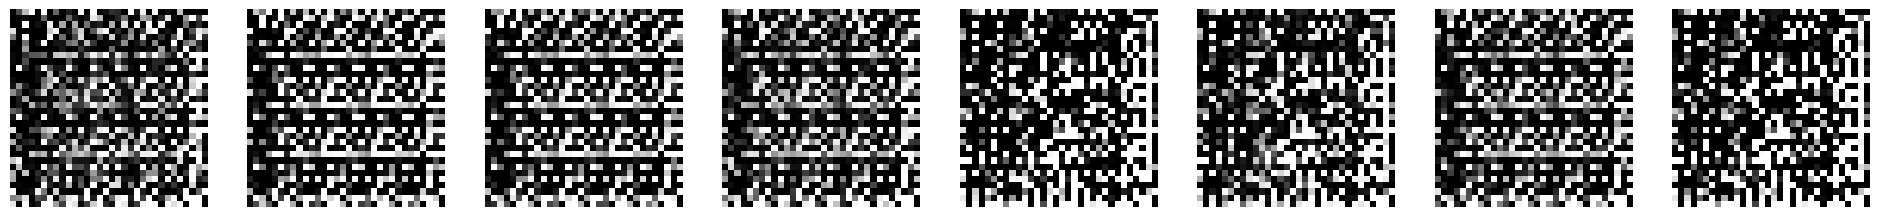

Epoch [111/200], D Loss: 10.0000, G Loss: 95.0000
Epoch [112/200], D Loss: 10.0000, G Loss: 95.0000
Epoch [113/200], D Loss: 10.0000, G Loss: 95.0000
Epoch [114/200], D Loss: 10.0000, G Loss: 95.0000
Epoch [115/200], D Loss: 10.0000, G Loss: 95.0000
Epoch [116/200], D Loss: 10.0000, G Loss: 95.0000
Epoch [117/200], D Loss: 10.0000, G Loss: 95.0000
Epoch [118/200], D Loss: 10.0000, G Loss: 95.0000
Epoch [119/200], D Loss: 10.0000, G Loss: 95.0000
Epoch [120/200], D Loss: 10.0000, G Loss: 95.0000


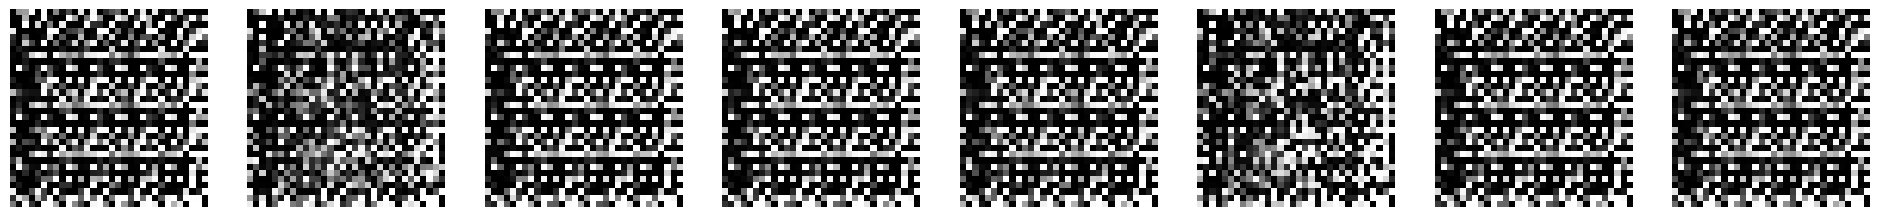

Epoch [121/200], D Loss: 10.0000, G Loss: 95.0000
Epoch [122/200], D Loss: 10.0000, G Loss: 95.0000
Epoch [123/200], D Loss: 10.0000, G Loss: 95.0000
Epoch [124/200], D Loss: 10.0000, G Loss: 95.0000
Epoch [125/200], D Loss: 10.0000, G Loss: 95.0000
Epoch [126/200], D Loss: 10.0000, G Loss: 95.0000
Epoch [127/200], D Loss: 10.0000, G Loss: 95.0000
Epoch [128/200], D Loss: 10.0000, G Loss: 95.0000
Epoch [129/200], D Loss: 10.0000, G Loss: 95.0000
Epoch [130/200], D Loss: 10.0000, G Loss: 95.0000


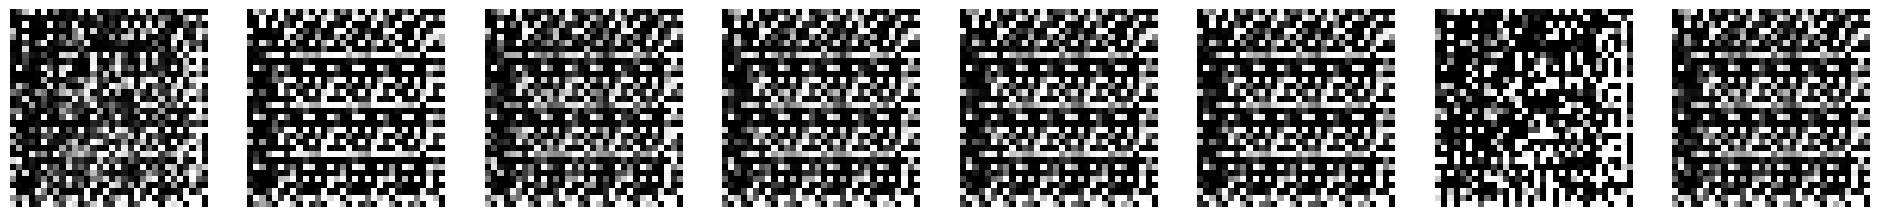

Epoch [131/200], D Loss: 10.0000, G Loss: 95.0000
Epoch [132/200], D Loss: 10.0000, G Loss: 95.0000
Epoch [133/200], D Loss: 10.0000, G Loss: 95.0000
Epoch [134/200], D Loss: 10.0000, G Loss: 95.0000
Epoch [135/200], D Loss: 10.0000, G Loss: 95.0000
Epoch [136/200], D Loss: 10.0000, G Loss: 95.0000
Epoch [137/200], D Loss: 10.0000, G Loss: 95.0000
Epoch [138/200], D Loss: 10.0000, G Loss: 95.0000
Epoch [139/200], D Loss: 10.0000, G Loss: 95.0000
Epoch [140/200], D Loss: 10.0000, G Loss: 95.0000


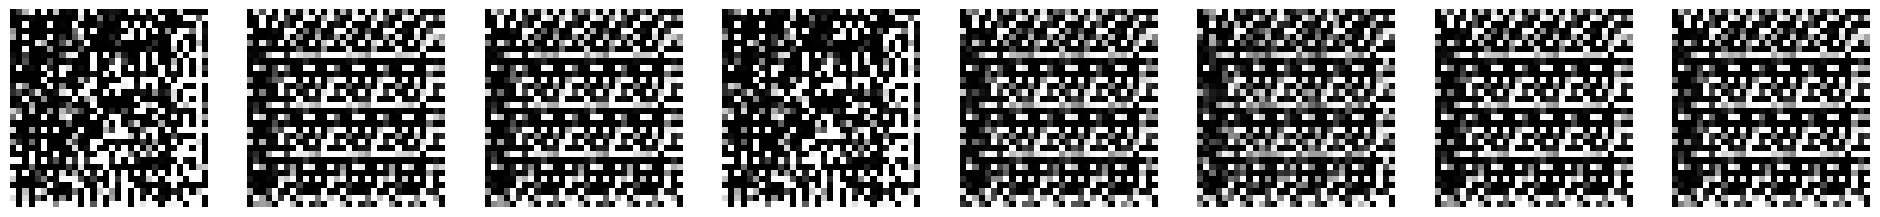

Epoch [141/200], D Loss: 10.0000, G Loss: 95.0000
Epoch [142/200], D Loss: 10.0000, G Loss: 95.0000
Epoch [143/200], D Loss: 10.0000, G Loss: 95.0000
Epoch [144/200], D Loss: 10.0000, G Loss: 95.0000
Epoch [145/200], D Loss: 10.0000, G Loss: 95.0000
Epoch [146/200], D Loss: 10.0000, G Loss: 95.0000
Epoch [147/200], D Loss: 10.0000, G Loss: 95.0000
Epoch [148/200], D Loss: 10.0000, G Loss: 95.0000
Epoch [149/200], D Loss: 10.0000, G Loss: 95.0000
Epoch [150/200], D Loss: 10.0000, G Loss: 95.0000


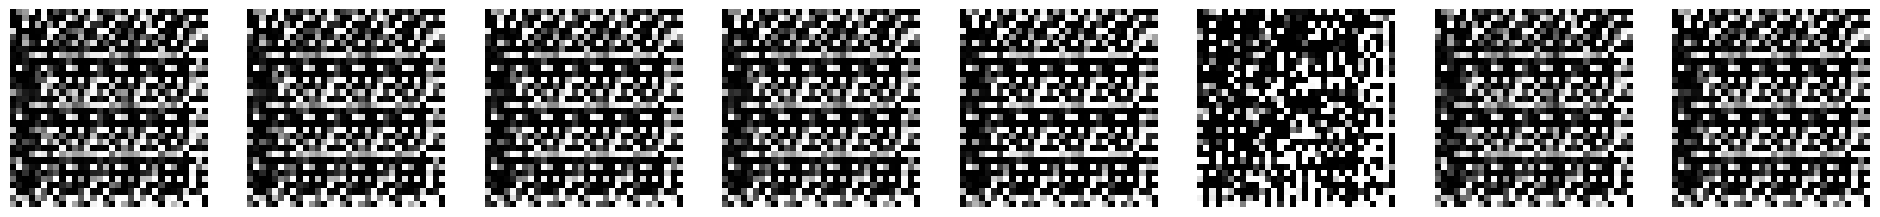

Epoch [151/200], D Loss: 10.0000, G Loss: 95.0000
Epoch [152/200], D Loss: 10.0000, G Loss: 95.0000
Epoch [153/200], D Loss: 10.0000, G Loss: 95.0000
Epoch [154/200], D Loss: 10.0000, G Loss: 95.0000
Epoch [155/200], D Loss: 10.0000, G Loss: 95.0000
Epoch [156/200], D Loss: 10.0000, G Loss: 95.0000
Epoch [157/200], D Loss: 10.0000, G Loss: 95.0000
Epoch [158/200], D Loss: 10.0000, G Loss: 95.0000
Epoch [159/200], D Loss: 10.0000, G Loss: 95.0000
Epoch [160/200], D Loss: 10.0000, G Loss: 95.0000


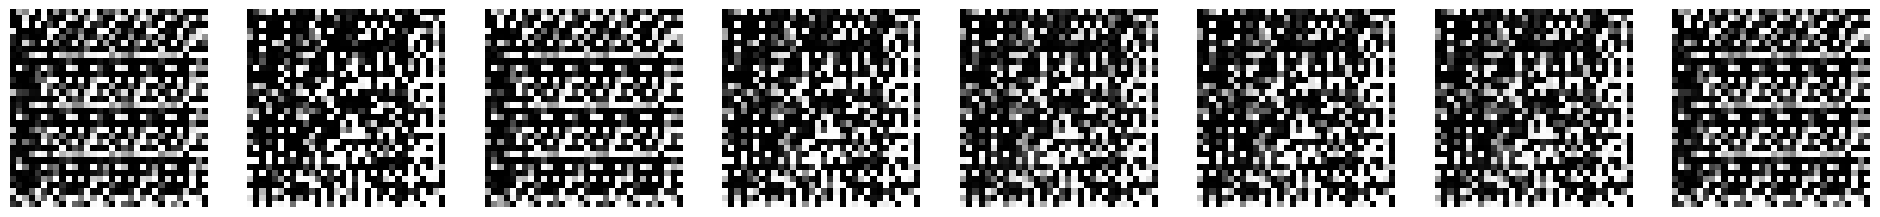

Epoch [161/200], D Loss: 10.0000, G Loss: 95.0000
Epoch [162/200], D Loss: 10.0000, G Loss: 95.0000
Epoch [163/200], D Loss: 10.0000, G Loss: 95.0000
Epoch [164/200], D Loss: 10.0000, G Loss: 95.0000
Epoch [165/200], D Loss: 10.0000, G Loss: 95.0000
Epoch [166/200], D Loss: 10.0000, G Loss: 95.0000
Epoch [167/200], D Loss: 10.0000, G Loss: 95.0000
Epoch [168/200], D Loss: 10.0000, G Loss: 95.0000
Epoch [169/200], D Loss: 10.0000, G Loss: 95.0000
Epoch [170/200], D Loss: 10.0000, G Loss: 95.0000


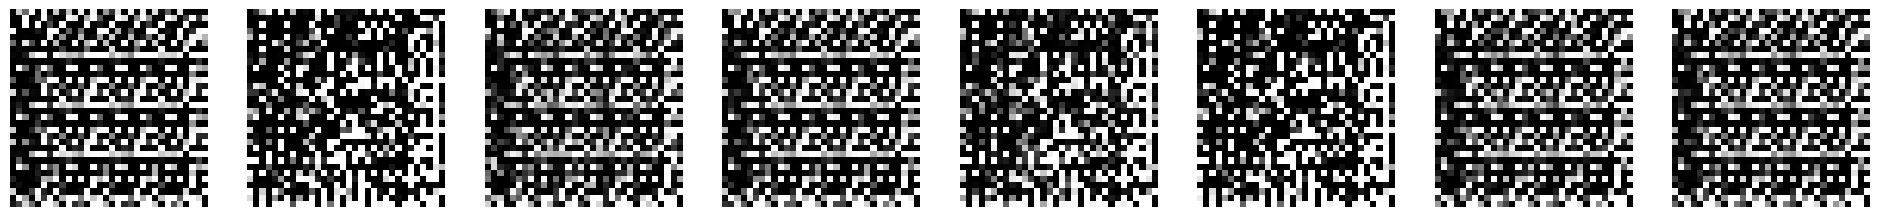

Epoch [171/200], D Loss: 10.0000, G Loss: 95.0000
Epoch [172/200], D Loss: 10.0000, G Loss: 95.0000
Epoch [173/200], D Loss: 10.0000, G Loss: 95.0000
Epoch [174/200], D Loss: 10.0000, G Loss: 95.0000
Epoch [175/200], D Loss: 10.0000, G Loss: 95.0000
Epoch [176/200], D Loss: 10.0000, G Loss: 95.0000
Epoch [177/200], D Loss: 10.0000, G Loss: 95.0000
Epoch [178/200], D Loss: 10.0000, G Loss: 95.0000
Epoch [179/200], D Loss: 10.0000, G Loss: 95.0000
Epoch [180/200], D Loss: 10.0000, G Loss: 95.0000


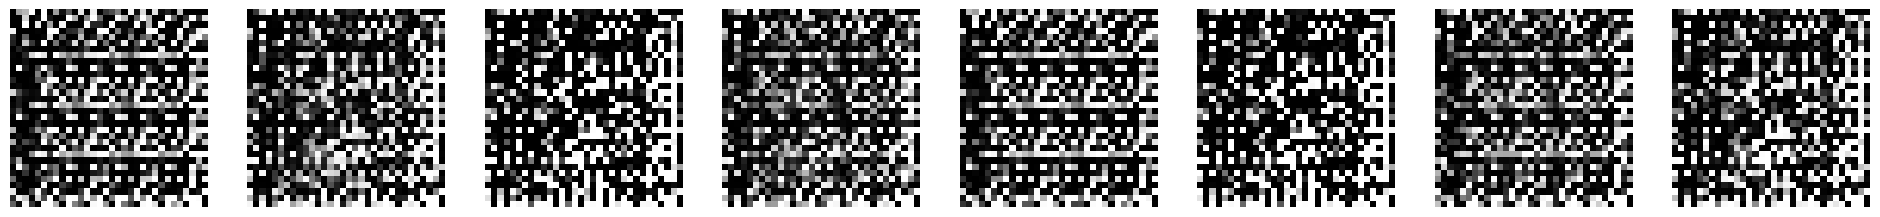

Epoch [181/200], D Loss: 10.0000, G Loss: 95.0000
Epoch [182/200], D Loss: 10.0000, G Loss: 95.0000
Epoch [183/200], D Loss: 10.0000, G Loss: 95.0000
Epoch [184/200], D Loss: 10.0000, G Loss: 95.0000
Epoch [185/200], D Loss: 10.0000, G Loss: 95.0000
Epoch [186/200], D Loss: 10.0000, G Loss: 95.0000
Epoch [187/200], D Loss: 10.0000, G Loss: 95.0000
Epoch [188/200], D Loss: 10.0000, G Loss: 95.0000
Epoch [189/200], D Loss: 10.0000, G Loss: 95.0000
Epoch [190/200], D Loss: 10.0000, G Loss: 95.0000


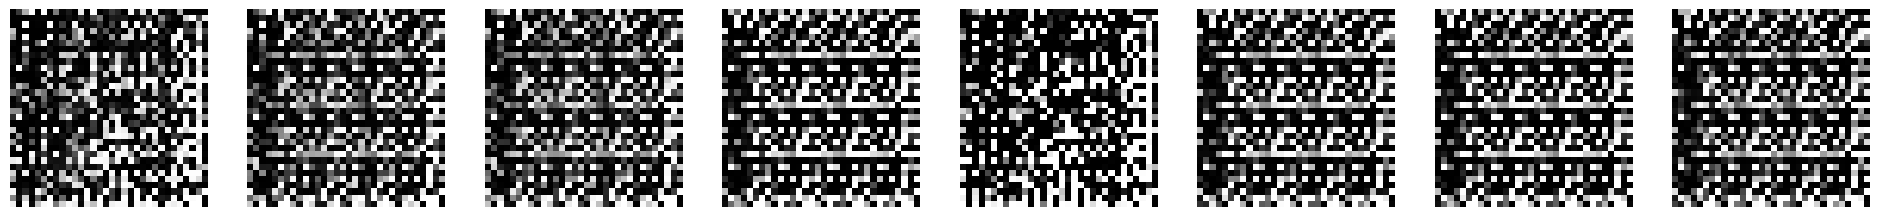

Epoch [191/200], D Loss: 10.0000, G Loss: 95.0000
Epoch [192/200], D Loss: 10.0000, G Loss: 95.0000
Epoch [193/200], D Loss: 10.0000, G Loss: 95.0000
Epoch [194/200], D Loss: 10.0000, G Loss: 95.0000
Epoch [195/200], D Loss: 10.0000, G Loss: 95.0000
Epoch [196/200], D Loss: 10.0000, G Loss: 95.0000
Epoch [197/200], D Loss: 10.0000, G Loss: 95.0000
Epoch [198/200], D Loss: 10.0000, G Loss: 95.0000
Epoch [199/200], D Loss: 10.0000, G Loss: 95.0000
Epoch [200/200], D Loss: 10.0000, G Loss: 95.0000


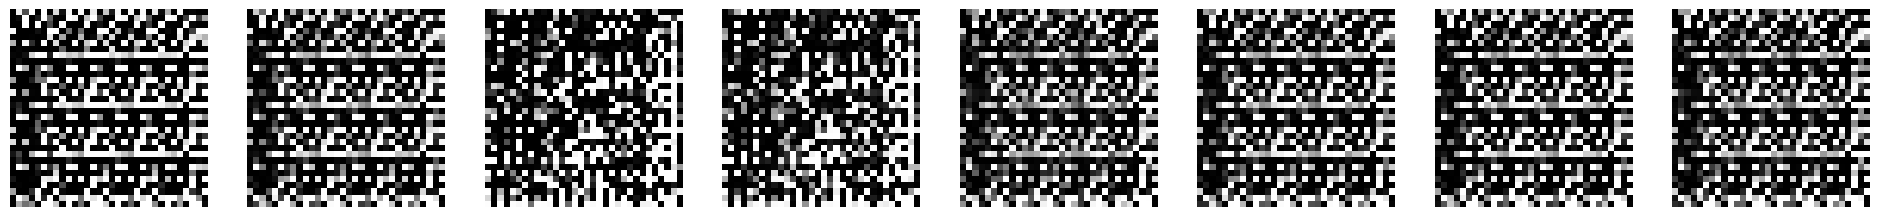

In [4]:
adversarial_net.train_gan(generator, discriminator, dataloader, epochs, latent_dim)

# Tabular GANs training pipeline